In [49]:
# importings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import joblib
%matplotlib inline

In [3]:
# defining the ticker
tsla = yf.Ticker('TSLA')
#Displaying stock information
tsla.info

{'zip': '78725',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 99290,
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limited warrantie

In [30]:
history = tsla.history(period="Max")
df = pd.DataFrame(history)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [31]:
# defining x and y 
x = df.index
y = df['Close']
y

Date
2010-06-29 00:00:00-04:00      1.592667
2010-06-30 00:00:00-04:00      1.588667
2010-07-01 00:00:00-04:00      1.464000
2010-07-02 00:00:00-04:00      1.280000
2010-07-06 00:00:00-04:00      1.074000
                                ...    
2022-12-28 00:00:00-05:00    112.709999
2022-12-29 00:00:00-05:00    121.820000
2022-12-30 00:00:00-05:00    123.180000
2023-01-03 00:00:00-05:00    108.099998
2023-01-04 00:00:00-05:00    113.639999
Name: Close, Length: 3152, dtype: float64

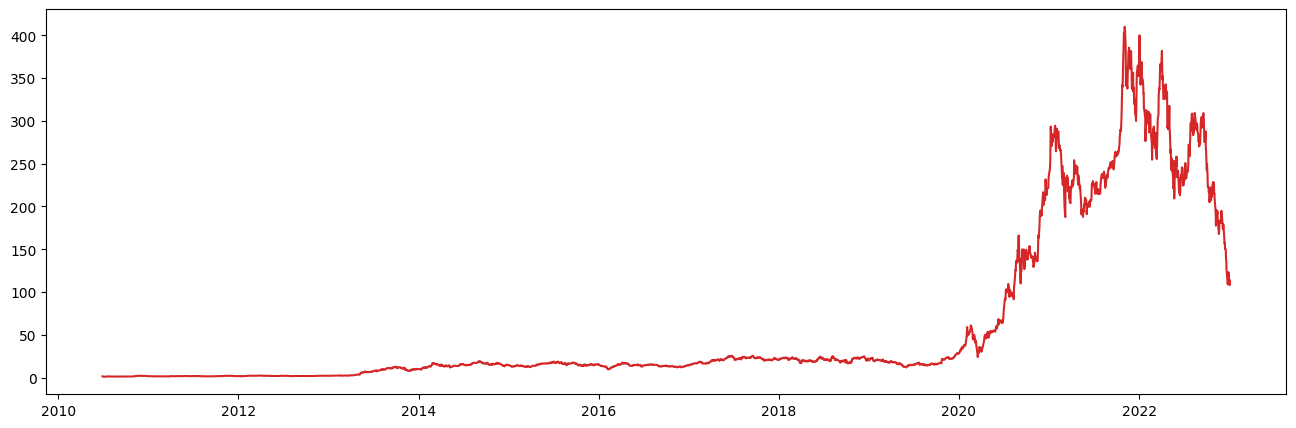

In [32]:
plt.figure(figsize=(16,5))
plt.plot(x, y, color='tab:red')
plt.show()

In [33]:
# Data Processing and scaling
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [34]:
df = df.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume', 'Dividends': 'divs', 'Stock Splits': 'split'})
df.head()

,date,open,high,low,close,volume,divs,split
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [35]:
new_df = df.drop(columns=['divs','split'])

In [37]:
#data split
x = new_df[['open', 'high','low', 'volume']]
y = new_df['close']

In [39]:
# Linear regression Model for stock prediction 
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False, random_state = 0)

In [40]:
#shapes
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(2679, 4)
(473, 4)
(2679,)
(473,)


In [41]:
#linear regression
regression = LinearRegression()
regression.fit(train_x, train_y)

LinearRegression()

In [42]:
#predictions
predicted = regression.predict(test_x)
print(test_x.head())

            open        high         low     volume
2679  265.000000  265.596680  259.123322   56874900
2680  254.213333  256.166656  236.733337  111809100
2681  220.710007  237.869995  206.333328  199820700
2682  237.283340  248.333328  231.389999  110301000
2683  242.050003  245.736664  223.526672  117071700


In [43]:
dfr = pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr.head(10)

,Actual_Price,Predicted_Price
2679,260.433319,260.901391
2680,238.166672,244.239139
2681,232.946671,227.128812
2682,247.339996,243.150303
2683,227.406662,233.118297
2684,225.166672,226.155716
2685,239.476669,237.204368
2686,228.813339,232.525695
2687,217.733337,224.958079
2688,207.146667,210.153016


In [45]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))

Mean Absolute Error (MAE): 2.9999115572905595
Mean Squared Error (MSE) : 16.46658502577992
Root Mean Squared Error (RMSE): 4.057904018798365


In [46]:
df.describe()

,open,high,low,close,volume,divs,split
count,3152.000000,3152.000000,3152.000000,3152.000000,3.152000e+03,3152.0,3152.000000
mean,58.895431,60.212565,57.433848,58.840530,9.366710e+07,0.0,0.002538
std,95.638311,97.833890,93.153766,95.505103,8.172342e+07,0.0,0.103845
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06,0.0,0.000000
25%,8.983167,9.149833,8.770334,8.969000,4.235572e+07,0.0,0.000000
50%,16.245667,16.497666,15.955000,16.239334,7.600740e+07,0.0,0.000000
75%,24.664667,25.115499,24.167999,24.656667,1.174845e+08,0.0,0.000000
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08,0.0,5.000000


In [47]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2 / y2 * 100
print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  99.6429304184655


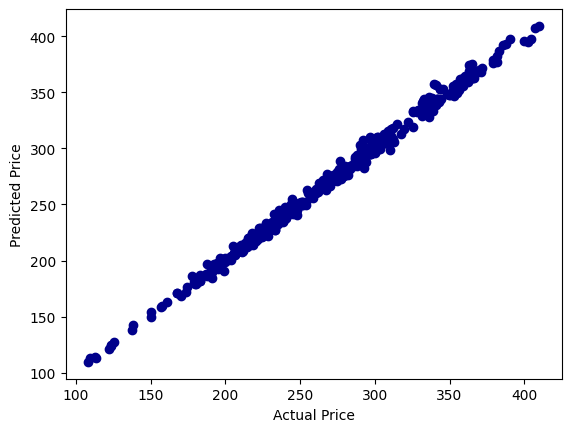

In [48]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [50]:
#saving model for API
filename = "stock_pred_model.joblib"

# save model
joblib.dump(regression, filename)

['stock_pred_model.joblib']